# Experience : Surconsommation de Nourriture Hyperpalatable

In [121]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
import sys
import os
# Ajouter le dossier src au chemin d'importation
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [123]:
import matplotlib.pyplot as plt
import torch 
import numpy as np

In [124]:
from environments.extreme_deviation_env import ExtremeDeviationEnvironment
from models.qlearning import QLearning

### Configuration de l'environnement

In [139]:
# Paramètres de l'environnement
initial_state = torch.tensor([100])  # État interne initial
setpoints = torch.tensor([100])  # État optimal
weights = torch.tensor([1.0])  # Poids pour les états internes
exponents = [2, 2]  # Exposants pour le calcul du drive
effects = {0: -10, 1: 10}  # Effets des actions : 0 = diminuer, 1 = augmenter
penalty_factor = 0.1  # Facteur de punition pour déviations extrêmes
deviation_threshold = 30  # Seuil pour déviations extrêmes

# Instanciation de l'environnement
env = ExtremeDeviationEnvironment(
    H=initial_state,
    setpoints=setpoints,
    weights=weights,
    exponents=exponents,
    effects=effects,
    penalty_factor=penalty_factor,
    deviation_threshold=deviation_threshold,
)

### Configuration de l'agent

In [140]:
state_size = 1  # Taille des états discrétisés 
action_size = len(effects)  # Nombre d'actions possibles (0 et 1)
alpha = 0.1  # Taux d'apprentissage
gamma = 0.95  # Facteur d'actualisation
epsilon = 0.1  # Exploration-exploitation

q_table = {
    0: np.zeros(2), # Un seul etats : deux actions : diminuer et augementer l'etats interne
}

# Initialisation de l'agent
agent = QLearning(state_size=state_size, action_size=action_size, alpha=alpha, gamma=gamma, epsilon=epsilon, q_table=q_table)

### Entraînement du modèle

In [ ]:
episodes = 1000
reward_history = []
mean_internal_states_per_ep = []

for episode in range(episodes):
    state = env.reset()
    state_idx = int(state)
    total_reward = 0
    done = False    
    internal_states = []
    
    steps = 100
    for _ in range(0,steps):
        # Choisir une action
        action = agent.choose_action(state)

        # Effectuer une étape
        next_state, reward, done, _ = env.step(action)
        next_state_idx = int(next_state)

        # Mettre à jour la table Q
        agent.update_q_value(state_idx, action, reward, next_state_idx)

        # Passer à l'état suivant
        state_idx = next_state_idx
        total_reward += reward

        internal_states.append(env.state)
        #print(env.state)

    reward_history.append(total_reward)
    mean_internal_states_per_ep.append(np.mean(internal_states))

    print(f"Épisode {episode}, Récompense totale = {total_reward}, etats interne moyen : {mean_internal_states_per_ep[episode].item()}")

Épisode 0, Récompense totale = -867.0, etats interne : -860.0
Épisode 1, Récompense totale = -164.0, etats interne : 280.0
Épisode 2, Récompense totale = -525.0, etats interne : 680.0
Épisode 3, Récompense totale = -57.0, etats interne : 40.0
Épisode 4, Récompense totale = -543.0, etats interne : 700.0
Épisode 5, Récompense totale = -199.0, etats interne : 320.0
Épisode 6, Récompense totale = -164.0, etats interne : -80.0
Épisode 7, Récompense totale = -73.0, etats interne : 180.0
Épisode 8, Récompense totale = -218.0, etats interne : -140.0
Épisode 9, Récompense totale = -127.0, etats interne : 240.0
Épisode 10, Récompense totale = -74.0, etats interne : 180.0
Épisode 11, Récompense totale = -91.0, etats interne : 200.0
Épisode 12, Récompense totale = -144.0, etats interne : -60.0
Épisode 13, Récompense totale = -16.0, etats interne : 80.0
Épisode 14, Récompense totale = -38.0, etats interne : 140.0
Épisode 15, Récompense totale = -128.0, etats interne : 240.0
Épisode 16, Récompense t

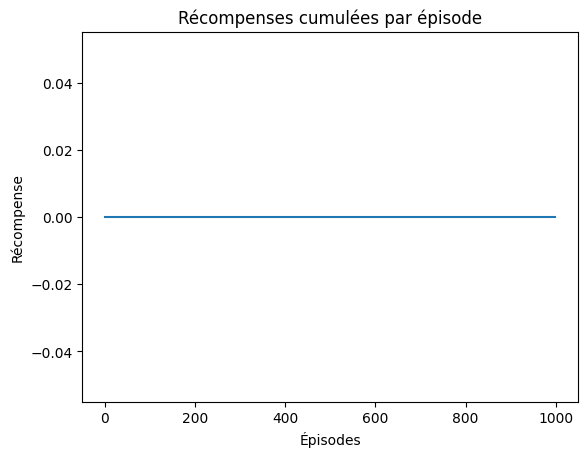

Text(0.5, 1.0, 'interal states')

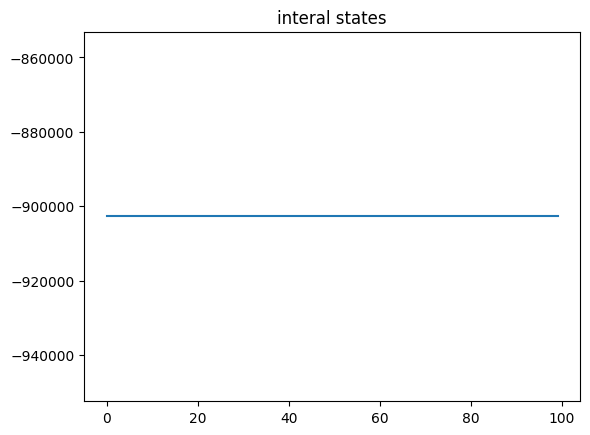

In [128]:
plt.plot(reward_history)
plt.title("Récompenses cumulées par épisode")
plt.xlabel("Épisodes")
plt.ylabel("Récompense")
plt.show()

plt.plot(internal_states)
plt.title("interal states")